In [3]:
import pandas as pd

In [4]:
# Import the data
file = '../Resources/SFO_Airport_Utility_Consumption.csv'
utilities_df = pd.read_csv(file)

utilities_df.head()

,Year,Month Number,Month,Utility,Owner,Units,Usage
0,2013,1,Jan,Passengers,Campus,PAX,3209356.0
1,2013,1,Jan,Gas,Commission,Therms,363205.0
2,2013,1,Jan,Gas,Tenant,Therms,49393.0
3,2013,1,Jan,Electricity,Commission,kWh,12904353.0
4,2013,1,Jan,Electricity,Tenant,kWh,14002156.0


# Question: 
### Which utility's usage changed the most from 2013 to 2018?

In [6]:
utilities_df.shape

(560, 7)

In [13]:
#categorize the data by Utility and owner 
#create rate of change by month
#Xet average per PAX 

# Filter data for the years 2013 and 2018
data_2013 = utilities_df[utilities_df['Year'] == 2013]
data_2018 = utilities_df[utilities_df['Year'] == 2018]

# Group by Utility and sum up Usage for each utility type for 2013 and 2018
usage_2013 = data_2013.groupby('Utility')['Usage'].sum()
usage_2018 = data_2018.groupby('Utility')['Usage'].sum()

# Calculate the change in usage from 2013 to 2018
change_in_usage = usage_2018 - usage_2013

# Find the utility with the maximum change (either increase or decrease)
max_change_utility = change_in_usage.abs().idxmax()
max_change_value = change_in_usage[max_change_utility]

max_change_utility, max_change_value

('Electricity', -19065323.899999976)

In [18]:
# Filter data for utilities of interest and passengers
utilities_of_interest = ['Electricity', 'Gas', 'Water']
data_utilities = utilities_df[utilities_df['Utility'].isin(utilities_of_interest + ['Passengers'])]

# Calculate monthly total passengers
monthly_passengers = data_utilities[data_utilities['Utility'] == 'Passengers'].groupby('Month')['Usage'].sum()

# Calculate monthly total utility usage for Electricity, Gas, and Water
monthly_utility_usage = data_utilities.groupby(['Utility', 'Month'])['Usage'].sum().unstack(0)

# Calculate usage per passenger for each utility by month
usage_per_passenger = monthly_utility_usage.div(monthly_passengers, axis=0)

# Filter out the 'Passengers' row to ensure we only have Electricity, Gas, and Water
usage_per_passenger = usage_per_passenger[utilities_of_interest]

usage_per_passenger


Utility,Electricity,Gas,Water
Month,,,
Apr,6.187369,0.072211,0.000008
Aug,5.580408,0.042973,0.000007
Dec,6.297234,0.085817,0.000007
Feb,7.102025,0.095718,0.000008
Jan,7.117733,0.097316,0.000008
Jul,5.514598,0.050641,0.000007
Jun,5.505594,0.055289,0.000007
Mar,6.467234,0.079802,0.000007
May,5.972774,0.067583,0.000007


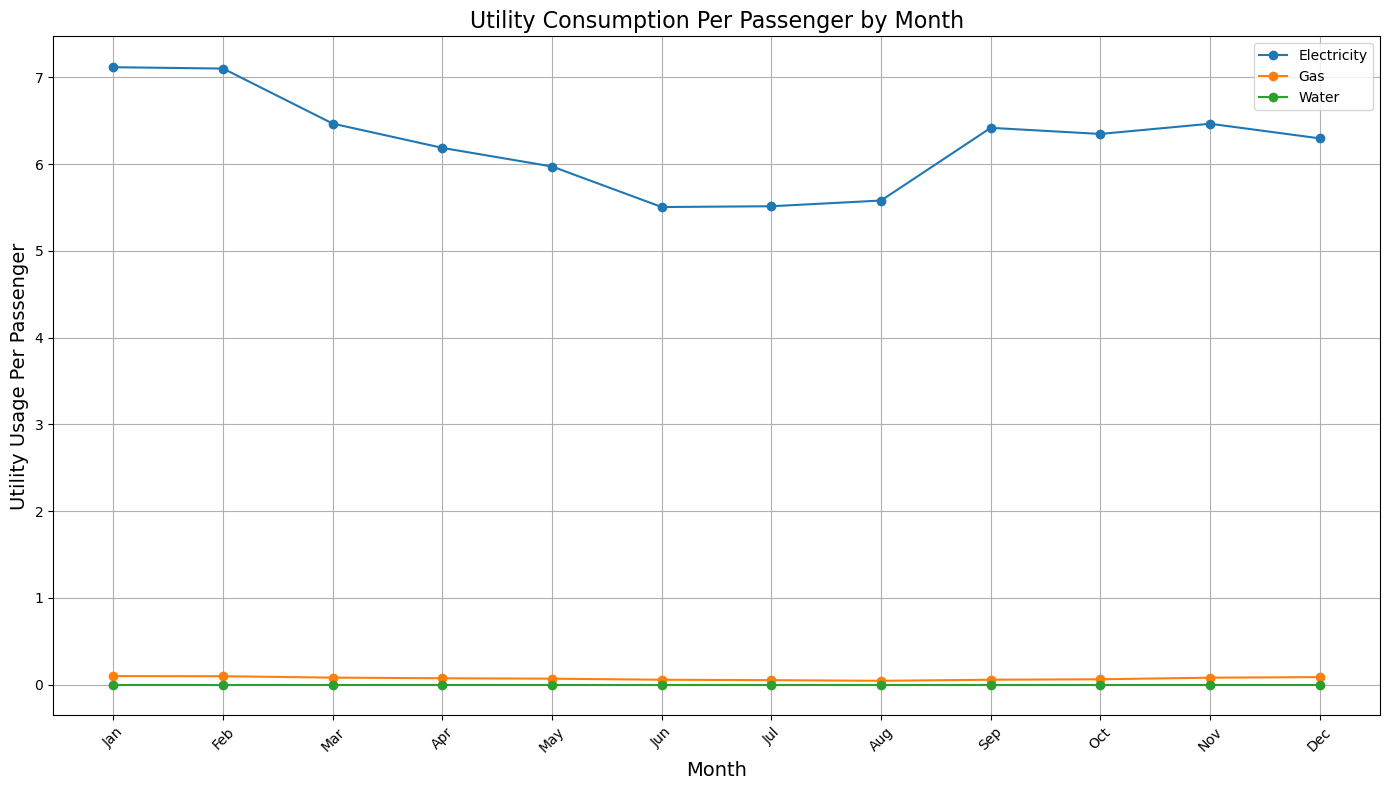

In [15]:
import matplotlib.pyplot as plt

# Plotting the utility consumption per passenger by month
fig, ax = plt.subplots(figsize=(14, 8))

# Ensuring months are in calendar order for plotting
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
usage_per_passenger = usage_per_passenger.reindex(months_order)

# Plotting each utility
for utility in utilities_of_interest:
    ax.plot(usage_per_passenger.index, usage_per_passenger[utility], marker='o', label=utility)

ax.set_title('Utility Consumption Per Passenger by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Utility Usage Per Passenger', fontsize=14)
ax.grid(True)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Re-calculating monthly total passengers, this time grouping by month and year
monthly_yearly_passengers = data_utilities[data_utilities['Utility'] == 'Passengers'].groupby(['Year', 'Month Number', 'Month'])['Usage'].sum().reset_index()

# Creating a multi-index (Year, Month Number) for passenger data to facilitate matching with utility data
passenger_index = pd.MultiIndex.from_frame(monthly_yearly_passengers[['Year', 'Month Number']])
monthly_yearly_passengers.index = passenger_index
monthly_yearly_passengers.drop(['Year', 'Month Number', 'Month'], axis=1, inplace=True)

# Re-calculating monthly total utility usage for Electricity, Gas, and Water, grouped by month and year
monthly_yearly_utility_usage = data_utilities.groupby(['Year', 'Month Number', 'Utility'])['Usage'].sum().unstack().fillna(0)
monthly_yearly_utility_usage = monthly_yearly_utility_usage[utilities_of_interest]  # Filter to only include specified utilities

# Calculate usage per passenger for each utility by month and year
usage_per_passenger_monthly_yearly = monthly_yearly_utility_usage.div(monthly_yearly_passengers['Usage'], axis=0)

usage_per_passenger_monthly_yearly.head()


Utility            Electricity       Gas     Water
Year Month Number                                 
2013 1                8.383772  0.128561  0.000010
     2                8.234618  0.123972  0.000010
     3                7.684531  0.100939  0.000008
     4                7.487248  0.086947  0.000009
     5                7.159428  0.078401  0.000008

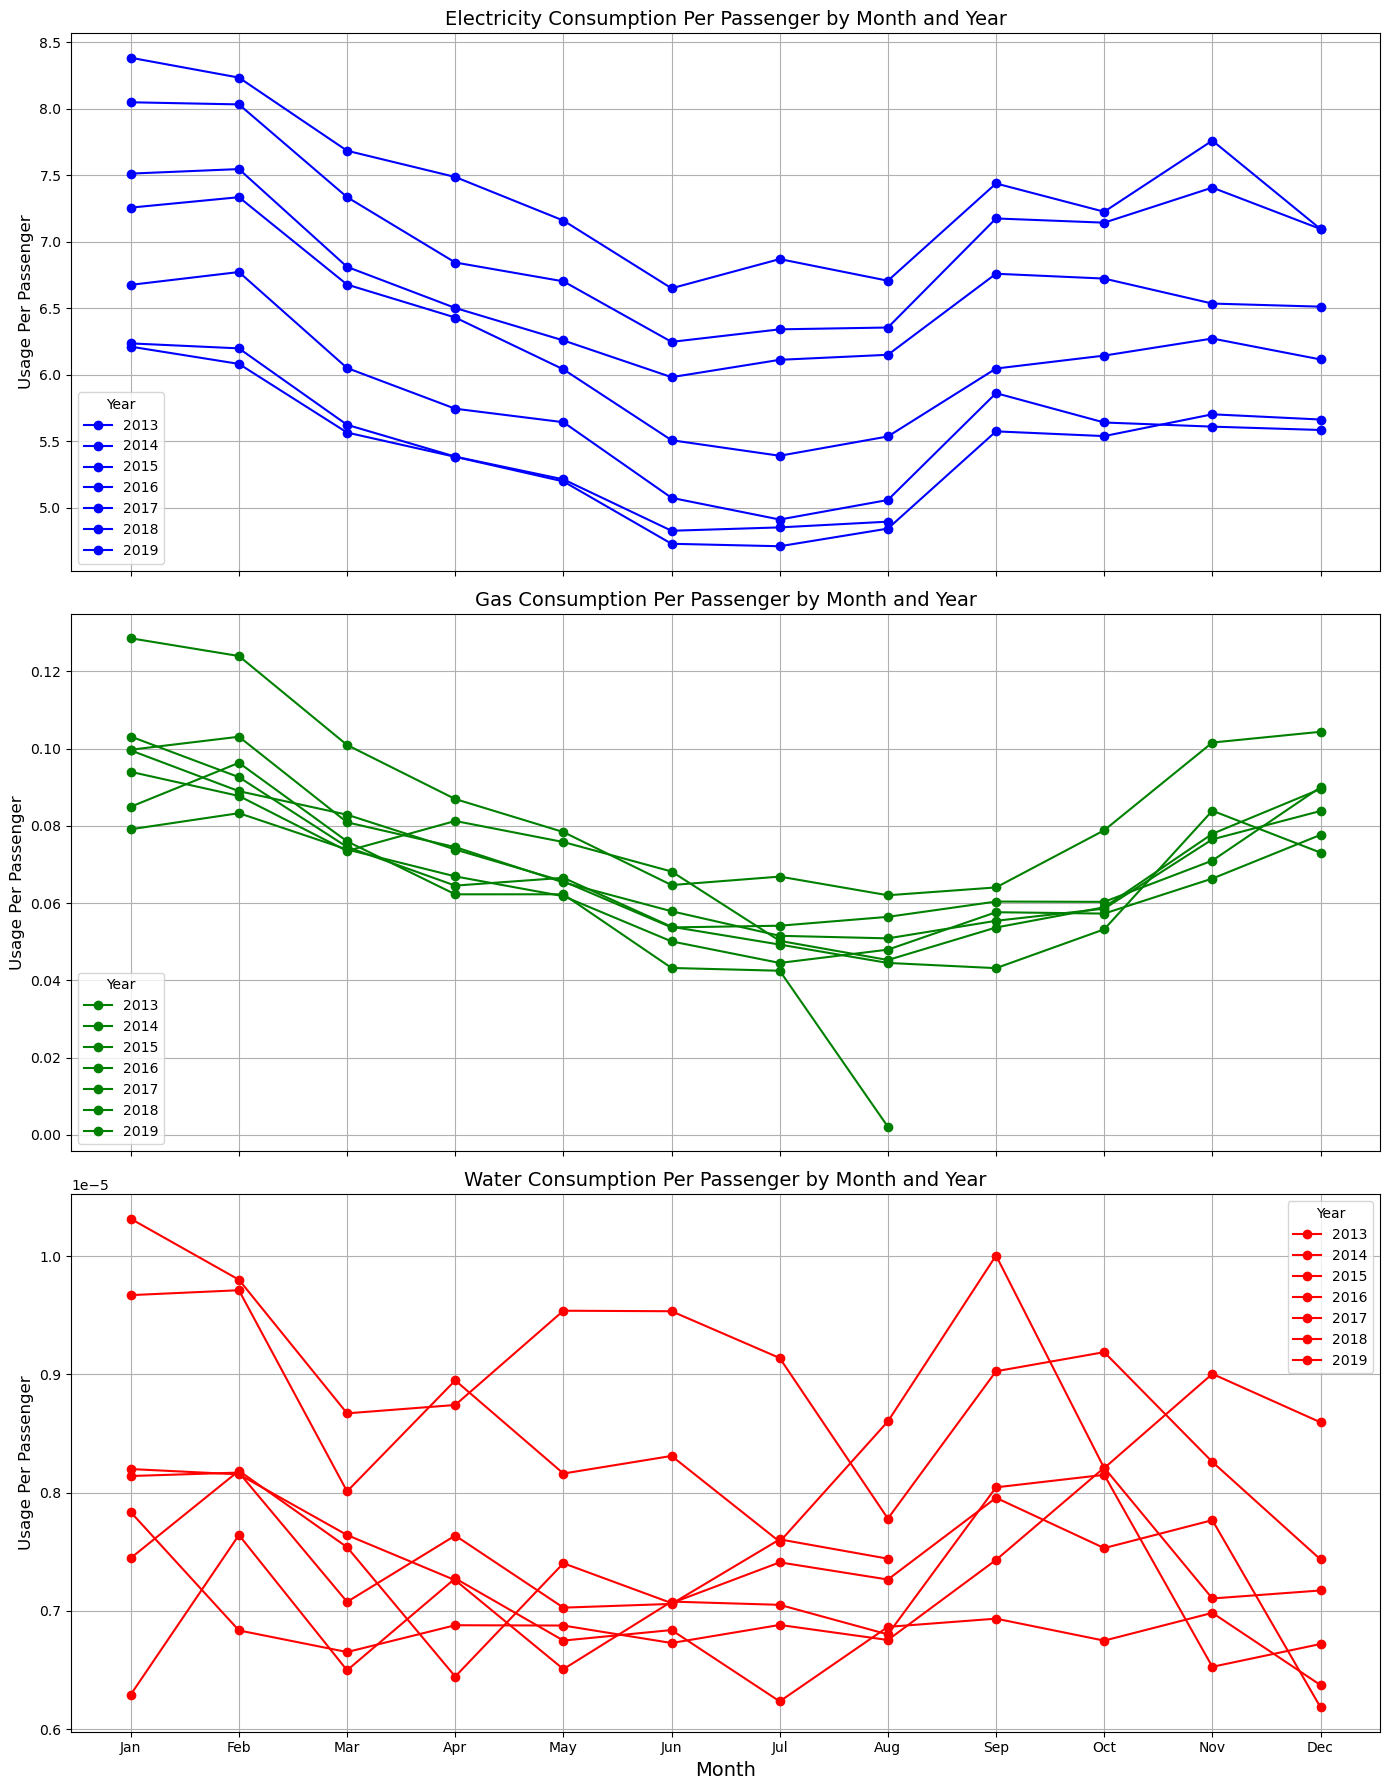

In [21]:
# Plotting the utility consumption per passenger by month and year
fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot settings
colors = {'Electricity': 'blue', 'Gas': 'green', 'Water': 'red'}
utilities = ['Electricity', 'Gas', 'Water']

for i, utility in enumerate(utilities):
    # Prepare data for plotting
    data_to_plot = usage_per_passenger_monthly_yearly[utility].unstack(level=0)  # Unstack the 'Year' to get columns
    axs[i].plot(data_to_plot, color=colors[utility], marker='o', linestyle='-')
    
    axs[i].set_title(f'{utility} Consumption Per Passenger by Month and Year', fontsize=14)
    axs[i].set_ylabel('Usage Per Passenger', fontsize=12)
    axs[i].grid(True)
    axs[i].legend(data_to_plot.columns, title="Year")

# Set common labels
plt.xlabel('Month', fontsize=14)
plt.xticks(range(1, 13), months_order)  # Set x-ticks to month names
plt.tight_layout()
plt.show()

# Summary
{Write your summary here.}

The utility whose usage changed the most from 2013 to 2018 at the San Francisco Airport was Electricity, with a decrease of approximately 19,065,324 units (kWh). This indicates a significant reduction in electricity consumption over the five-year period.